# Introduction

## Objective

The objective of this project is to predict whether it will be Payment default in the first EMI on Vehicle Loan on due date or not using the Loan Default Prediction Dataset from Kaggle<cite data-cite="load_default_data">1</cite>. The original dataset came from L&T Financial Services & Analytics Vidhya presented 'DataScience FinHack' competition.  
This project has two phases. Phase I focuses on data pre-processing and exploration of the data, as covered in this report. We shall present model building in Phase II. The rest of this report is organised as follows. Section 2 describes the data sets and their attributes. Section 3 covers data pre-processing. In Section 4, we explore each attribute and their inter-relationships.
The last section presents a brief summary of the report. Compiled from Jupyter Notebook, this report contains both
narratives and the Python codes used for data pre-processing and exploration as a part of phase I of the project.

## Data Sets

The Kaggle Machine Learning datasets provides one data set named 'train.csv' under the heading 'Loan Default Prediction'. Names of attributes are adapted from the data description provided in Kaggle. Data set consist of 40 descriptive features and one target feature. In Phase II, we will build the classifiers from the the data set and evaluate their performance using cross-validation.

### Target Feature

The response feature is loan_default which is given as:

$$\text{loan_default} = \begin{cases} 1 & \text{ if it will be Payment default in the first EMI on due date} \\ 0 & \text{ if it will not be Payment default in the first EMI on due date }\end{cases}$$

The target feature has two classes and hence it is a binary classification problem. To reiterate, the goal is to
predict **whether or not it will be Payment default in the first EMI on due date by Customer**.


### Descriptive Features

The variable description is produced here from the data description itself : 

* **`UniqueID`**: Identifier for customers
* **`disbursed_amount`**: Amount of Loan disbursed
* **`asset_cost`**: Cost of the Asset
* **`ltv`**: Loan to Value of the asset
* **`branch_id`**: Branch where the loan was disbursed
* **`supplier_id`**: Vehicle Dealer where the loan was disbursed
* **`manufacturer_id`**: Vehicle manufacturer(Hero, Honda, TVS etc.)
* **`Current_pincode_ID`**: Current pincode of the customer
* **`Date.of.Birth`**: Date of birth of the customer
* **`Employment.Type`**: Employment Type of the customer (Salaried/Self Employed)
* **`DisbursalDate`**: Date of disbursement
* **`State_ID`**: State of disbursement
* **`Employee_code_ID`**: Employee of the organization who logged the disbursement
* **`MobileNo_Avl_Flag`**: if Mobile no. was shared by the customer then flagged as 1
* **`Aadhar_flag`**: if aadhar was shared by the customer then flagged as 1
* **`PAN_flag`**: if pan was shared by the customer then flagged as 1
* **`VoterID_flag`**: if voter was shared by the customer then flagged as 1
* **`Driving_flag`**: if DL was shared by the customer then flagged as 1
* **`Passport_flag`**: if passport was shared by the customer then flagged as 1
* **`PERFORM_CNS.SCORE`**: Bureau Score
* **`PERFORM_CNS.SCORE.DESCRIPTION`**: Bureau score description
* **`PRI.NO.OF.ACCTS`**: count of total loans taken by the customer at the time of disbursement
* **`PRI.ACTIVE.ACCTS`**: count of active loans taken by the customer at the time of disbursement
* **`PRI.OVERDUE.ACCTS`**: count of default accounts at the time of disbursement
* **`PRI.CURRENT.BALANCE`**: total Principal outstanding amount of the active loans at the time of disbursement
* **`PRI.SANCTIONED.AMOUNT`**: total amount that was sanctioned for all the loans at the time of disbursement
* **`PRI.DISBURSED.AMOUNT`**: total amount that was disbursed for all the loans at the time of disbursement
* **`SEC.NO.OF.ACCTS`**: count of total loans taken by the customer at the time of disbursement
* **`SEC.ACTIVE.ACCTS`**: count of active loans taken by the customer at the time of disbursement
* **`SEC.OVERDUE.ACCTS`**: count of default accounts at the time of disbursement
* **`SEC.CURRENT.BALANCE`**: total Principal outstanding amount of the active loans at the time of disbursement
* **`SEC.SANCTIONED.AMOUNT`**: total amount that was sanctioned for all the loans at the time of disbursement
* **`SEC.DISBURSED.AMOUNT`**: total amount that was disbursed for all the loans at the time of disbursement
* **`PRIMARY.INSTAL.AMT`**: EMI Amount of the primary loan
* **`SEC.INSTAL.AMT`**: EMI Amount of the secondary loan
* **`NEW.ACCTS.IN.LAST.SIX.MONTHS`**: New loans taken by the customer in last 6 months before the disbursment
* **`DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS`**: Loans defaulted in the last 6 months
* **`AVERAGE.ACCT.AGE`**: Average loan tenure
* **`CREDIT.HISTORY.LENGTH`**: Time since first loan
* **`NO.OF_INQUIRIES`**: Enquries done by the customer for loans
* **`loan_default`**: Payment default in the first EMI on due date



# Data Pro-processsing

## Preliminaries

We read dataset from the local storage. Also, since the data set contains the attribute names, we do not need to explicitly specify those during loading the data sets.

In [1]:
#pd.show_versions(as_json=False)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
Loan_Data = pd.read_csv('Loan_Default_Data.csv', sep = ",")

In [3]:
Loan_Data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


## Data Cleaning and Transformation

First, we confirmed that the feature types matches the description as outlined in the documentation.

In [4]:
print(f"Dimension of the data set is{Loan_Data.shape}\n")
print(f"Data Types are:")
print(Loan_Data.dtypes)

Dimension of the data set is(233154, 41)

Data Types are:
UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PE

As can be seen, Only `Employment.Type` contains NA values in the dataset. We need to replace those values. We will check the value counts for this attribute and then come up with solution to replace these values in next section and remove unnecessary columns from the dataset.

In [5]:
print('Initial Null Counts: ')
print('')
Loan_Data.isnull().sum()

Initial Null Counts: 



UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

Employement Type has two categories of Employment, self employed and salaried. There can be people who are not employed. So we will replce NA values with third category of Employment.Type i.e. 'Unemployed'.

In [6]:
Loan_Data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [7]:
Loan_Data['Employment.Type'].fillna('Unemployed', inplace = True)

We will check the value counts for all unique IDs.

In [8]:
categoricalColumn = ['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID']

for col in categoricalColumn:
    print('Unique Valuess for ' + col)
    print(Loan_Data[col].nunique())
    print('')

Unique Valuess for UniqueID
233154

Unique Valuess for branch_id
82

Unique Valuess for supplier_id
2953

Unique Valuess for manufacturer_id
11

Unique Valuess for Current_pincode_ID
6698

Unique Valuess for State_ID
22

Unique Valuess for Employee_code_ID
3270



As discussed the in previous section, `UniqueID`, `supplier_id`, `Current_pincode_ID`, `DisbursalDate`, `Employee_code_ID` are removed as they are unnecessary & do not have any directly related predicting power. We will remove `Date.of.Birth` after extracting year part from the date for the age of customer. So, we will use dataset with 34 featues instead of 40 after ignoring these 6 features.

In [9]:
columns_to_drop = ['UniqueID', 'supplier_id', 'Current_pincode_ID', 'DisbursalDate', 'Employee_code_ID']
Loan_Data.drop(columns_to_drop, axis=1, inplace=True)
Loan_Data.shape

(233154, 36)

Some attributes are categorical but they are in integer so we will convert them into categorical.

In [10]:
Loan_Data['branch_id'] = Loan_Data['branch_id'].astype('category')
Loan_Data['manufacturer_id'] = Loan_Data['manufacturer_id'].astype('category')
Loan_Data['State_ID'] = Loan_Data['State_ID'].astype('category')
Loan_Data['NEW.ACCTS.IN.LAST.SIX.MONTHS'] = Loan_Data['NEW.ACCTS.IN.LAST.SIX.MONTHS'].astype('category')
Loan_Data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] = Loan_Data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].astype('category')
Loan_Data['NO.OF_INQUIRIES'] = Loan_Data['NO.OF_INQUIRIES'].astype('category')
Loan_Data['loan_default'] = Loan_Data['loan_default'].astype('category')
Loan_Data['Employment.Type'] = Loan_Data['Employment.Type'].astype('category')

We have checked for the NaN values in a dataset.

In [11]:
for i in ['disbursed_amount', 'asset_cost', 'ltv', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT']:
    print(i+' = '+str(np.isnan(Loan_Data[i]).sum()))

disbursed_amount = 0
asset_cost = 0
ltv = 0
MobileNo_Avl_Flag = 0
Aadhar_flag = 0
PAN_flag = 0
VoterID_flag = 0
Driving_flag = 0
Passport_flag = 0
PERFORM_CNS.SCORE = 0
PRI.NO.OF.ACCTS = 0
PRI.ACTIVE.ACCTS = 0
PRI.OVERDUE.ACCTS = 0
PRI.CURRENT.BALANCE = 0
PRI.SANCTIONED.AMOUNT = 0
PRI.DISBURSED.AMOUNT = 0
SEC.NO.OF.ACCTS = 0
SEC.ACTIVE.ACCTS = 0
SEC.OVERDUE.ACCTS = 0
SEC.CURRENT.BALANCE = 0
SEC.SANCTIONED.AMOUNT = 0
SEC.DISBURSED.AMOUNT = 0
PRIMARY.INSTAL.AMT = 0
SEC.INSTAL.AMT = 0


Table 1 shows that `AVERAGE.ACCT.AGE` & `CREDIT.HISTORY.LENGTH` are having string values for length in years and months with 192 & 294 unique values respectively. We will extract year & month part of the String to know Average Loan Tenure & Time since first loan in months as it is more informative than String values.

In [12]:
from IPython.display import display, HTML

display(HTML('<b>Summary Table of continuous features</b>'))
display(Loan_Data.describe())

display(HTML('<b>Summary Table of object features</b>'))
display(Loan_Data.describe(include = 'object'))

display(HTML('<b>Summary Table of categorical features</b>'))
display(Loan_Data.describe(include = 'category'))

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT
count,233154.000000,2.331540e+05,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05
mean,54356.993528,7.586507e+04,74.746530,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,...,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02
std,12971.314171,1.894478e+04,11.456636,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,...,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04
min,13320.000000,3.700000e+04,10.030000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,47145.000000,6.571700e+04,68.880000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,53803.000000,7.094600e+04,76.800000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,60413.000000,7.920175e+04,83.670000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,...,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00
max,990572.000000,1.628992e+06,95.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,...,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06


,Date.of.Birth,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
count,233154,233154,233154,233154
unique,15433,20,192,294
top,01-01-88,No Bureau History Available,0yrs 0mon,0yrs 0mon
freq,2173,116950,119373,119127


,branch_id,manufacturer_id,Employment.Type,State_ID,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154,233154,233154,233154,233154,233154,233154,233154
unique,82,11,3,22,26,14,25,2
top,2,86,Self employed,4,0,0,0,0
freq,13138,109534,127635,44870,181494,214959,201961,182543


### Categorical & Continuous Features

All the categorical variables have valid unque values, so we do not need to apply `lower()` or `strip()` functions to any of the features.

In [29]:
categoricalColumn = ['Employment.Type', 'branch_id', 'manufacturer_id', 'State_ID',
                     'NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                    'NO.OF_INQUIRIES','loan_default']

for col in categoricalColumn:
    print('Value Counts for ' + col)
    print(Loan_Data[col].value_counts())
    print('')

Value Counts for Employment.Type
Self employed    127635
Salaried          97858
Unemployed         7661
Name: Employment.Type, dtype: int64

Value Counts for branch_id
2      13138
67     11328
3       9230
5       9218
36      8832
136     7833
34      7794
16      6466
19      5860
1       5709
146     5376
18      5032
152     4933
61      4906
48      4725
11      4506
20      4431
138     4352
74      4297
120     4210
147     4160
10      4125
103     3878
251     3844
65      3509
160     3505
79      3413
7       3222
135     3203
8       3146
       ...  
77      1445
72      1294
257     1256
17      1160
130     1069
82      1035
165     1021
121      884
249      858
76       855
69       810
35       693
153      692
62       691
207      689
43       584
117      558
142      473
97       389
258      374
260      372
101      368
259      346
100      331
66       314
217      183
261      176
84       156
111       89
158       69
Name: branch_id, Length: 82, dtype: in

We have encoded bureau score of `PERFORM_CNS.SCORE.DESCRIPTION` feature from category to integer.

In [14]:
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'] = Loan_Data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)


Checking Unique values in each categorical attributes.

In [15]:
categoricalColumn = ['Employment.Type', 'branch_id', 'manufacturer_id', 'State_ID',
                     'NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                    'NO.OF_INQUIRIES', 'PERFORM_CNS.SCORE.DESCRIPTION', 'loan_default']

for col in categoricalColumn:
    print('Unique values for ' + col)
    print(Loan_Data[col].unique())
    print('')

Unique values for Employment.Type
[Salaried, Self employed, Unemployed]
Categories (3, object): [Salaried, Self employed, Unemployed]

Unique values for branch_id
[67, 78, 34, 130, 74, ..., 14, 121, 217, 84, 100]
Length: 82
Categories (82, int64): [67, 78, 34, 130, ..., 121, 217, 84, 100]

Unique values for manufacturer_id
[45, 86, 48, 51, 120, ..., 145, 67, 153, 156, 152]
Length: 11
Categories (11, int64): [45, 86, 48, 51, ..., 67, 153, 156, 152]

Unique values for State_ID
[6, 4, 3, 9, 5, ..., 8, 20, 19, 22, 21]
Length: 22
Categories (22, int64): [6, 4, 3, 9, ..., 20, 19, 22, 21]

Unique values for NEW.ACCTS.IN.LAST.SIX.MONTHS
[0, 1, 4, 2, 6, ..., 23, 16, 20, 18, 21]
Length: 26
Categories (26, int64): [0, 1, 4, 2, ..., 16, 20, 18, 21]

Unique values for DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
[0, 1, 2, 3, 5, ..., 9, 12, 10, 20, 11]
Length: 14
Categories (14, int64): [0, 1, 2, 3, ..., 12, 10, 20, 11]

Unique values for NO.OF_INQUIRIES
[0, 1, 4, 2, 3, ..., 23, 28, 16, 22, 36]
Length: 25
Ca

We have defined 2 functions **AvgAcctAge(x)** & **calcAge(x)** for calculate age of account in months &  age of customer in years respectively.

In [16]:
def AvgAcctAge(x):
    year = int(x.split(" ")[0].split("y")[0])
    month = int(x.split(" ")[1].split("m")[0])
    time_int = (12*year) + month
    return time_int


def calcAge(x):
    year = int(x.split('-')[2])
    if(year<=19):
        age = 20-year
    else:
        age = 100 + (20-year)
    return age


We will apply this function to our columns to gain values.

In [17]:
Loan_Data['Age']=Loan_Data['Date.of.Birth'].apply(calcAge)

Loan_Data["AvgAcctAge"] = Loan_Data['AVERAGE.ACCT.AGE'].apply(AvgAcctAge)
Loan_Data['CredAcctAge'] = Loan_Data['CREDIT.HISTORY.LENGTH'].apply(AvgAcctAge)

Now we will drop `Date.of.Birth`, `AVERAGE.ACCT.AGE` and `CREDIT.HISTORY.LENGTH` columns.

In [18]:
columns_to_drop = ['Date.of.Birth', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']
Loan_Data.drop(columns_to_drop, axis=1, inplace=True)
Loan_Data.shape

(233154, 36)

Final Check for Null Counts & Shape of Dataset

In [19]:
print('Final Null Counts : ')
print('')
print(Loan_Data.isnull().sum())
print('')
print('Final shape of Dataset : '+str(Loan_Data.shape))

Final Null Counts : 

disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
manufacturer_id                        0
Employment.Type                        0
State_ID                               0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCTS                  

# Data Exploration

## Univariate Visualisation

To avoid code repeatation, we defined two functions named `BarPlot(x)`<cite data-cite="mpl_col">6</cite> and `BoxAndHistogramPlot(x)`<cite data-cite="graph_gallery"> 7</cite> for categorical and numerical features respectively. For given an input categorical column `x`, `BarPlot(x)` returns a bar chart. A bar chart is useful to present the proportions by categories. For given an input numerical column `x`, `BoxHistogramPlot(x)` plots a histogram and a box plot. A histogram is useful to visualize the shape of the underlying distribution whereas a box plot tells the range of the attribute and helps detect any outliers. The following chunk codes show how these function were defined using the `numpy` library and the [matplotlib](https://matplotlib.org/) library.

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(color_codes=True)

def BarPlot(x): 
    sns.countplot(Loan_Data[x], palette = 'muted')
    plt.title(x,  fontsize = 20)

def BoxAndHistogramPlot(x):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x, ax=ax_box, color='red')
    sns.distplot(x, ax=ax_hist, color='magenta')

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

As can be seen from the graphs of categorical variables, Different branches of Bank, different Employment type, different manufacturer or ,state has different proportions of loan sanctioned. The bar plot of `NEW.ACCTS.IN.LAST.SIX.MONTHS` and `DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS` suggests than more than 80 percent customers have 0 Default Account in last six months or 0 new loans taken in last six months before the disbursement. The proportions of customer defaulting on fir EMI loan is, 21% outcomes with result **Yes** and 79% outcomes with result **No** in the dataset.

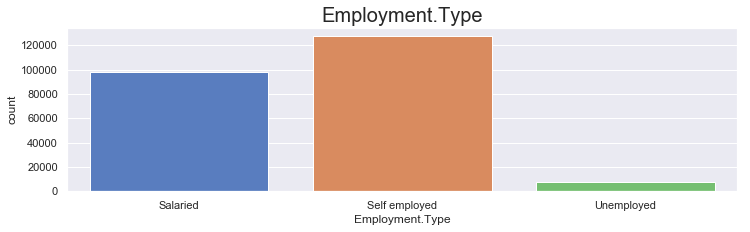

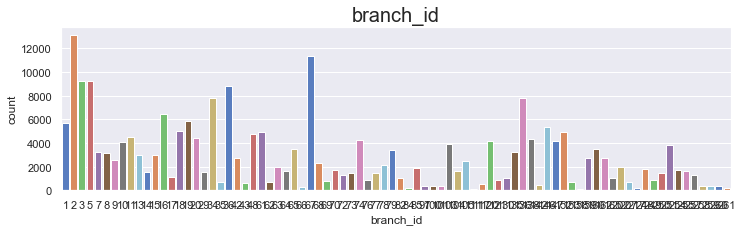

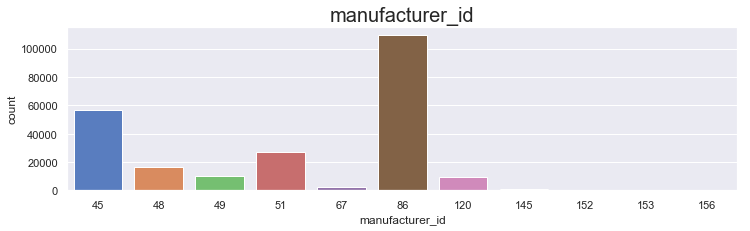

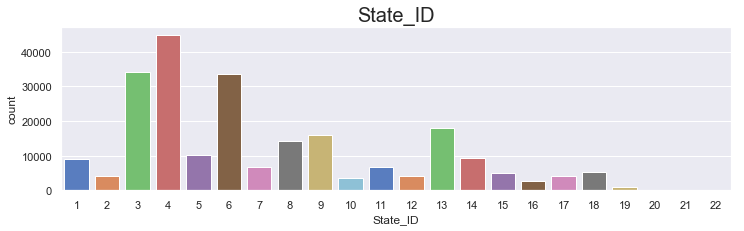

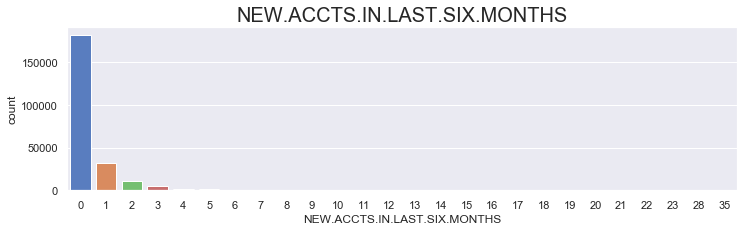

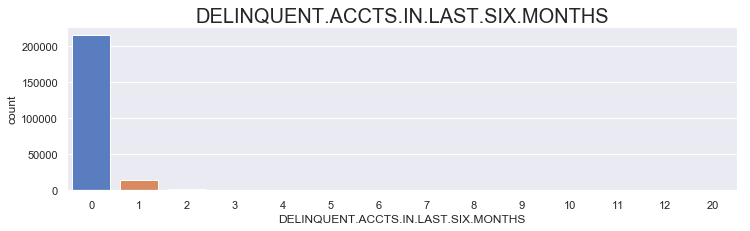

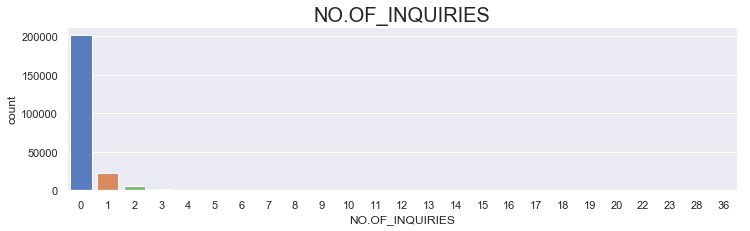

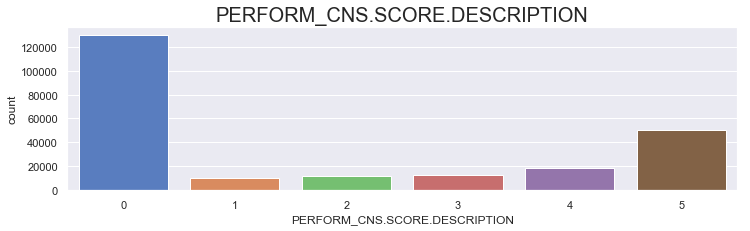

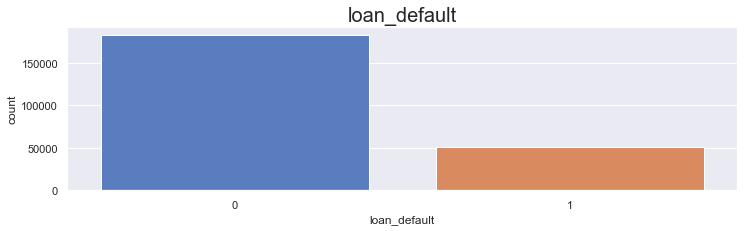

In [21]:
i = 1
for col in ['Employment.Type', 'branch_id', 'manufacturer_id', 'State_ID',
                     'NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                    'NO.OF_INQUIRIES', 'PERFORM_CNS.SCORE.DESCRIPTION', 'loan_default']:
    plt.figure(figsize=(12,3))
    plt.title("Figure " + str(i) + ": Bar Chart of " + col, fontsize = 12)
    BarPlot(col)
    plt.show()
    i = i + 1

We have also plotted graphs for `PRI.ACTIVE.ACCTS`, `PRI.OVERDUE.ACCTS`, `SEC.ACTIVE.ACCTS` and `SEC.OVERDUE.ACCTS` attributes to visualize the proportions of number of active and overdue loan accounts for customers.

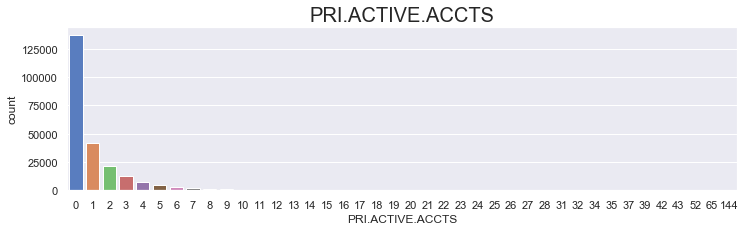

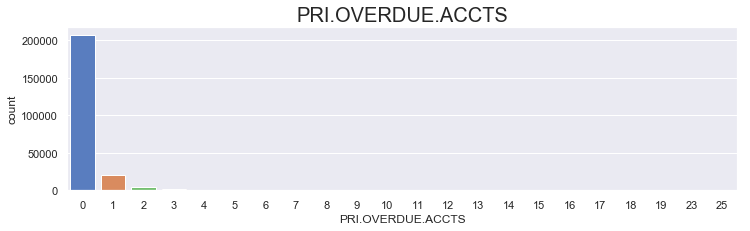

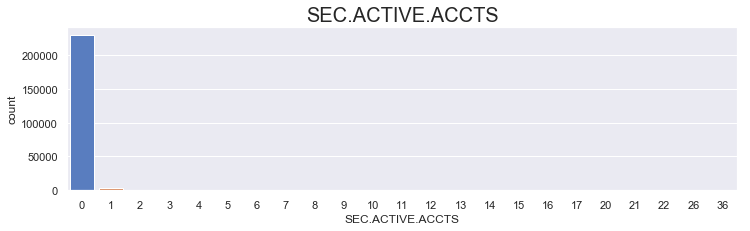

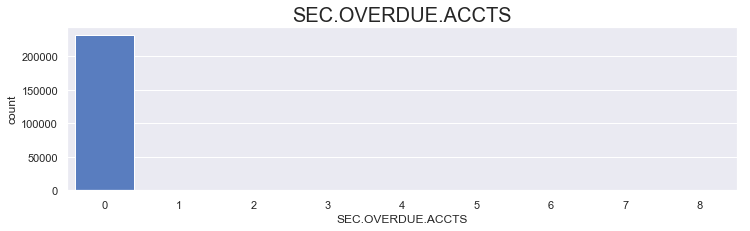

In [22]:
for col in ['PRI.ACTIVE.ACCTS',
                   'PRI.OVERDUE.ACCTS', 'SEC.ACTIVE.ACCTS',
                   'SEC.OVERDUE.ACCTS']:
    plt.figure(figsize=(12,3))
    plt.title("Figure " + str(i) + ": Bar Chart of " + col, fontsize = 12)
    BarPlot(col)
    plt.show()
    i = i + 1

The Feature derived from the attribute `Dtae.of.Birth`; `Age` is plotted here using `distplot()` funftion of 'seaborn' library. Majority of the loan takers are in the age group of 25 to 40 years.

Text(0.5, 1.0, 'Distribution of Age')

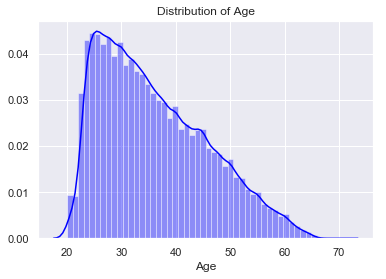

In [23]:
import seaborn as sns

sns.distplot(Loan_Data['Age'], color = 'blue')
plt.title('Distribution of Age')

The histograms & box plots of all continuous variables are plotted below. Histograms of `disbursed_amount` and `asset_cost` shows approximately **normally distributed values** with outliers. While large proportion of `PERFORM_CNS.SCORE` falls on zero, it has some values with a mean score of around 700 (Bureau or CIBIL Score). Graph of `ltv` has outliers and a **multiple spike** around the centre with the mean value of around 80. Rest of the attributes have majority of the values near to zero compare to other values. i.e. the data for `PRI.NO.OF.ACCTS`, `PRI.CURRENT.BALANCE`, `PRI.SANCTIONED.AMOUNT`,          `PRI.DISBURSED.AMOUNT`, `SEC.NO.OF.ACCTS`, `SEC.CURRENT.BALANCE`, `SEC.SANCTIONED.AMOUNT`, `SEC.DISBURSED.AMOUNT`, `PRIMARY.INSTAL.AMT` and `SEC.INSTAL.AMT` are having higher upper bound outliers with rest of the values in the range.

<Figure size 432x288 with 0 Axes>

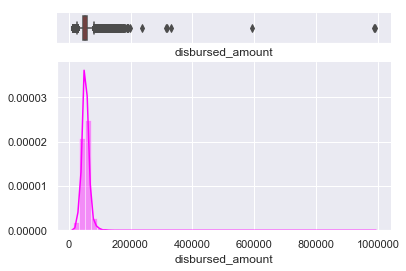

<Figure size 432x288 with 0 Axes>

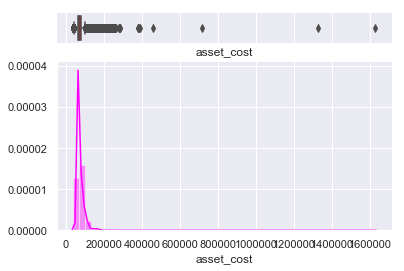

<Figure size 432x288 with 0 Axes>

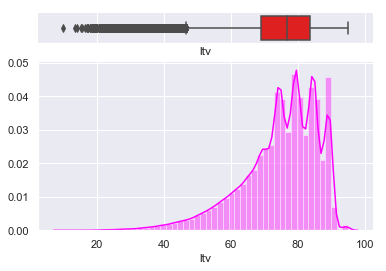

<Figure size 432x288 with 0 Axes>

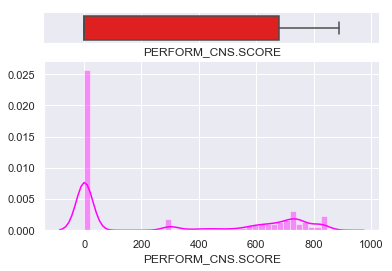

<Figure size 432x288 with 0 Axes>

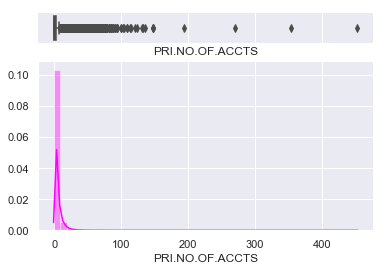

<Figure size 432x288 with 0 Axes>

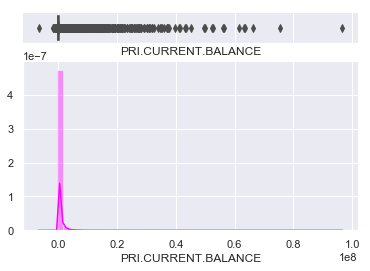

<Figure size 432x288 with 0 Axes>

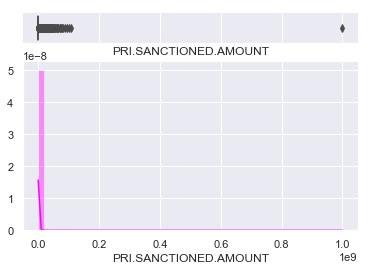

<Figure size 432x288 with 0 Axes>

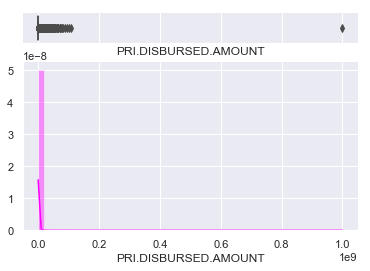

<Figure size 432x288 with 0 Axes>

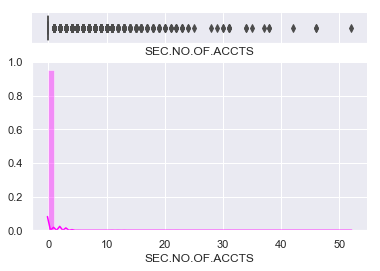

<Figure size 432x288 with 0 Axes>

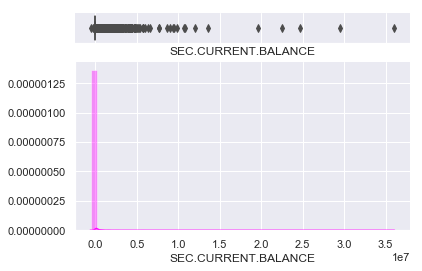

<Figure size 432x288 with 0 Axes>

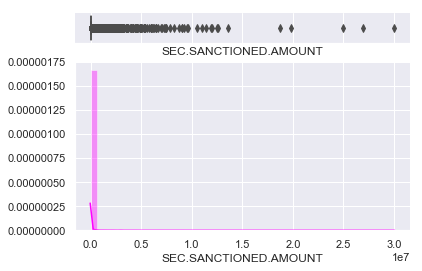

<Figure size 432x288 with 0 Axes>

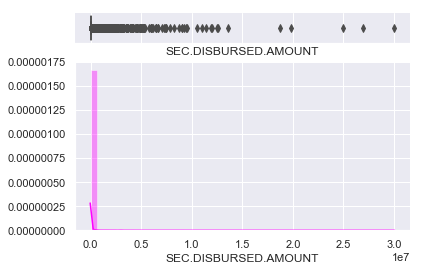

<Figure size 432x288 with 0 Axes>

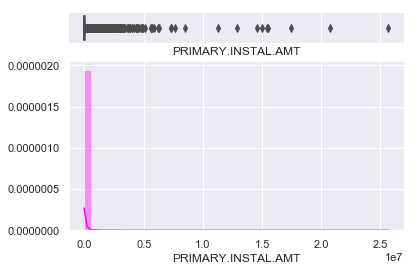

<Figure size 432x288 with 0 Axes>

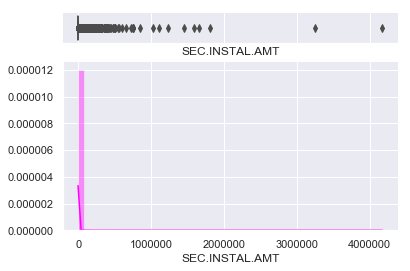

In [24]:
for col in ['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE','PRI.NO.OF.ACCTS',
                'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
                'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
                'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT']:
    plt.suptitle("Figure " + str(i) + ": Histogram and Box Plot of " + col)
    BoxAndHistogramPlot(Loan_Data[col])
    plt.show()
    i = 1 + i

## Multivariate Visualisation

### Histogram of Numeric Features Segregated by RainTomorrow

The following are histograms<cite data-cite="mpl_pyplot"> 8</cite> for each continuous attributes segregated by loan_default. Here it is observed that approximately 79% of the data is for the **No** value of target `loan_default` and 21% for **Yes** prediction for whether it will be Payment default or not in the first EMI on due date. Figure 31, 32, 35, 36, 37, 38 and 39 are left skewed in favour of it will not be Payment default in the first EMI on due date. This denotes that **Lower Disbursement Amount**, **Lower Asset cost** and **Lower active Loans Outstanding** tends to have **lower chances of Payment default in the first EMI on due date**. Also from the figure 29 & 30, it is obvious that **higher Loan to Value of the asset** and **higher Principal Outstanding Amount of the active loans** have **more chances of Payment default**. As for the `PERFORM_CNS.SCORE`, customers with **lower score** have **more chances of Payment defaults** & customer with **higher score** have **less chances of Payment defaults**.

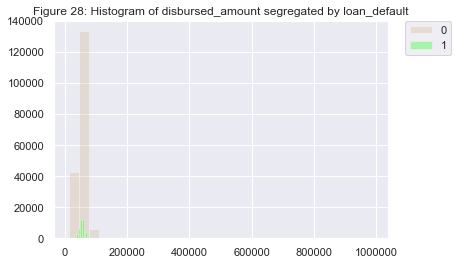

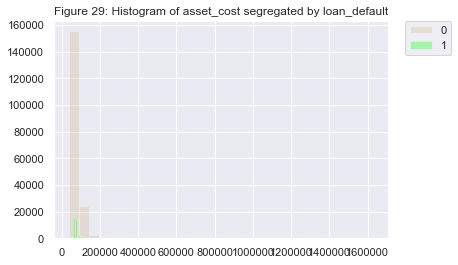

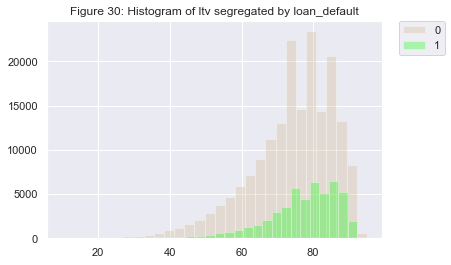

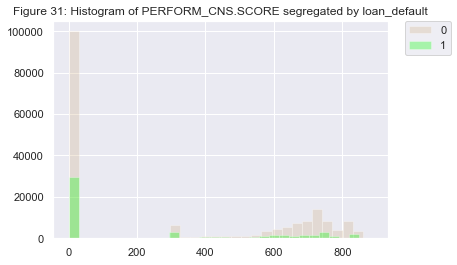

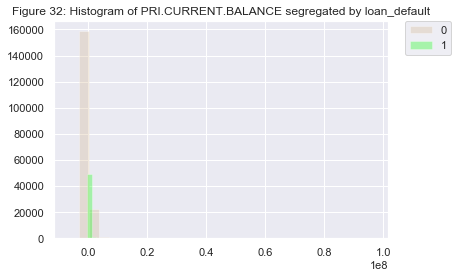

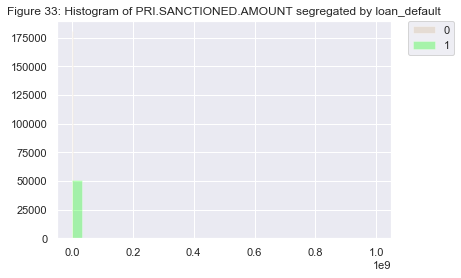

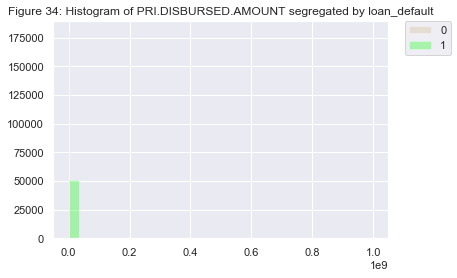

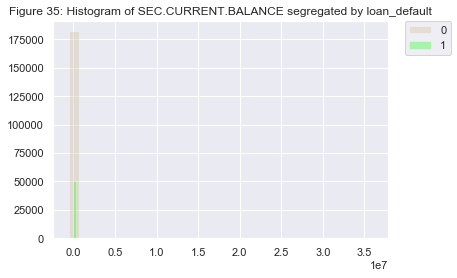

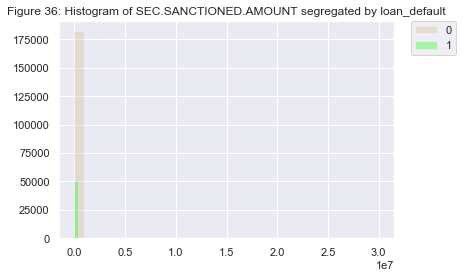

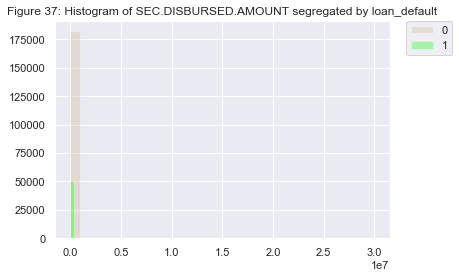

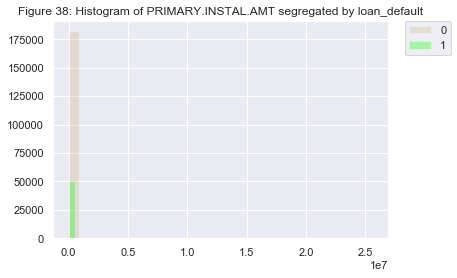

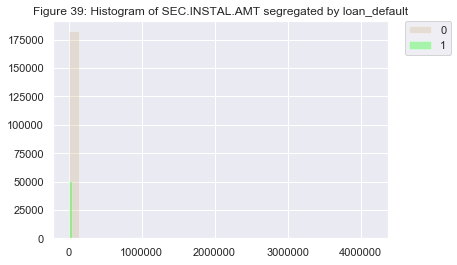

In [25]:
for col in ['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE',
                          'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
                   'PRI.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
                   'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT']:
    data1 = Loan_Data.loc[Loan_Data['loan_default']==0, col]
    data2 = Loan_Data.loc[Loan_Data['loan_default']==1, col]
    
    #sns.distplot( data1 , color="skyblue", label="No", hist_kws=dict(alpha=0.9))
    #sns.distplot( data1 , color="red", label="Yes", hist_kws=dict(alpha=0.6))
    plt.hist(data1, alpha = 0.3, bins = 30, color='tan')
    plt.hist(data2, alpha = 0.3, bins = 30, color='lime')
    plt.title("Figure " + str(i) + ": Histogram of " + col + " segregated by loan_default")
    i = i + 1
    plt.legend(Loan_Data['loan_default'].unique(), bbox_to_anchor=(1.05, 1), 
               loc=2, borderaxespad=0.)
    plt.show()

### Scatter Matrix (Pair Plot) of All Numeric Features

We have passed a list of some numeric attributes to draw a Scatter Matrix (Pair Plot)<cite data-cite="seabonn_index"> 9</cite> to visualize numeric variables to determine co-linearity between the variables. We observed from the scatter matrix that many attributes have **evenly distributed** relationship while others have positive linear other patterns as can be seen from below plot. For it to be displayed properly in report, we could not be able add more than 8 numeric attributes to visualize eplationship between all numeric attributes. 

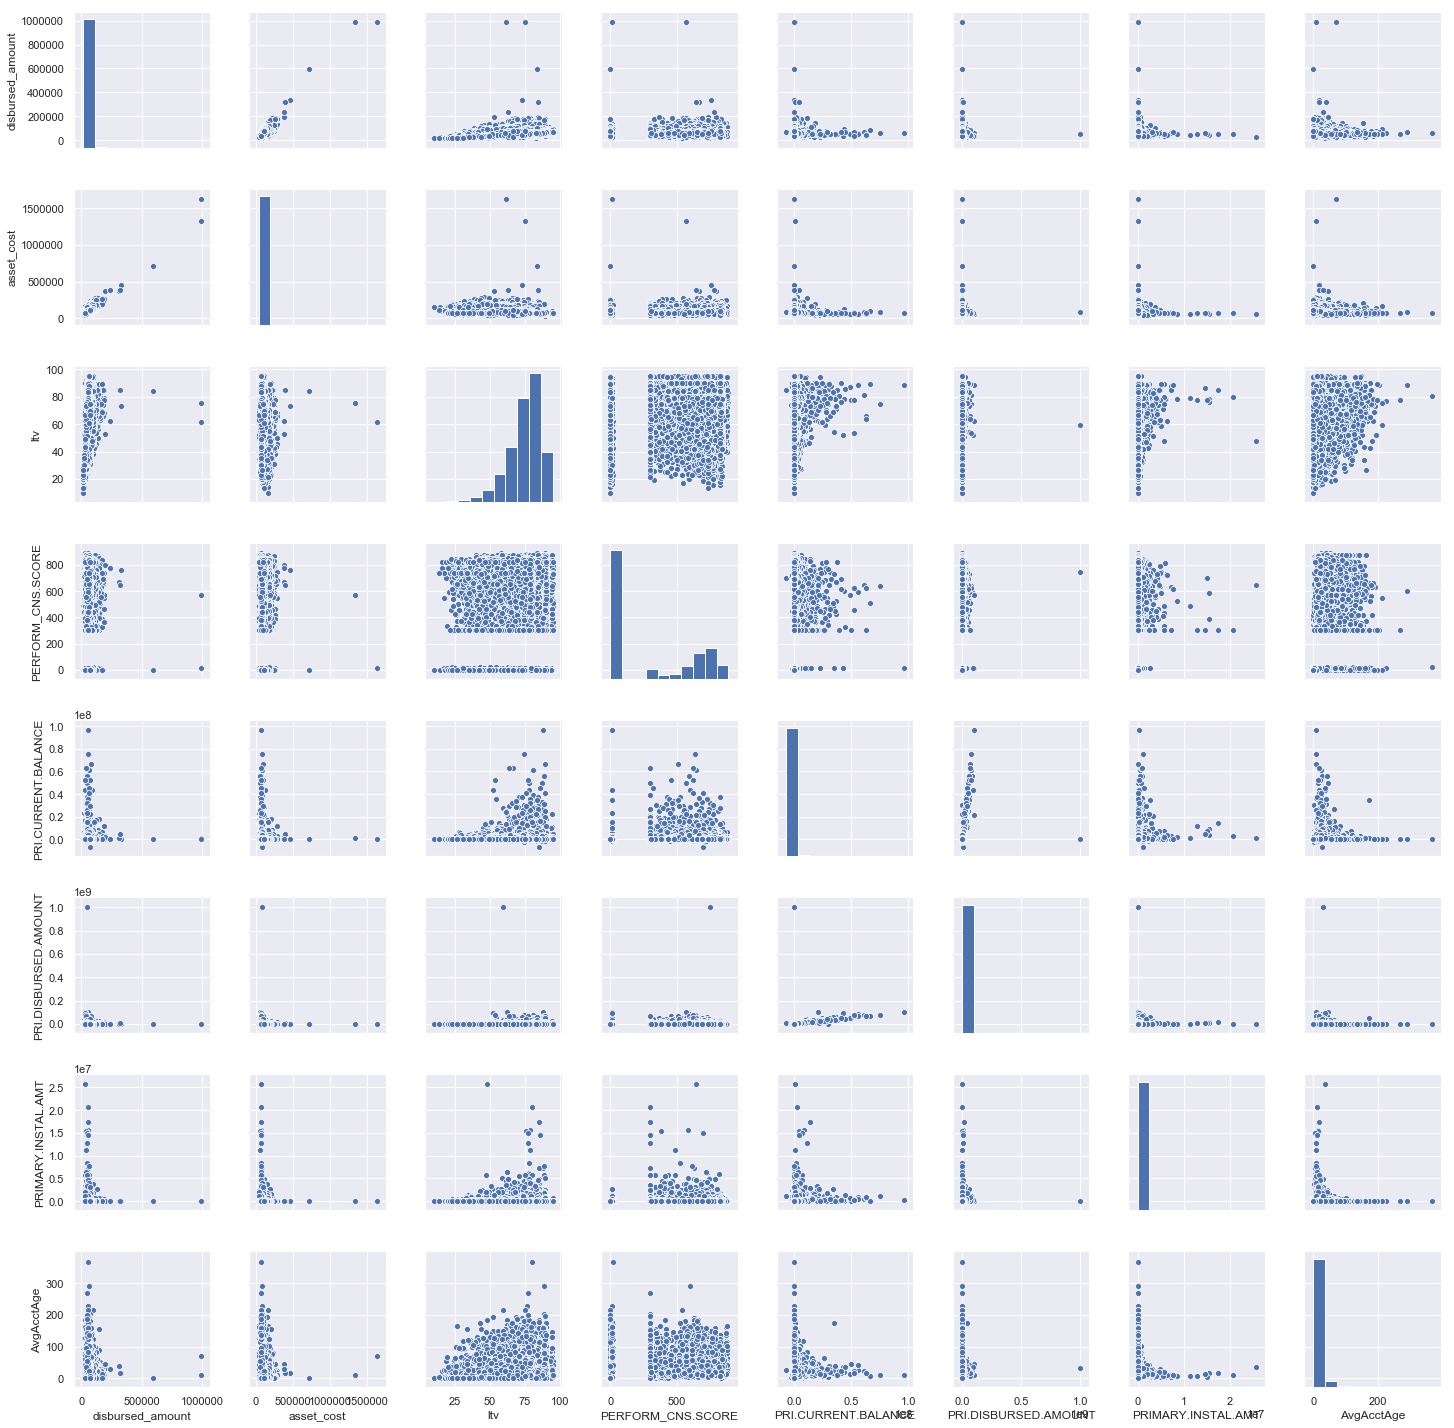

In [26]:
sns.pairplot(Loan_Data[['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE',
                          'PRI.CURRENT.BALANCE','PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 
                        'AvgAcctAge']])


### Categorical Attributes Segregated by RainTomorrow

We have defined a function called **BarPlotCategory(x,i)** which takes column name of dataset as input **x** and **i** to maintain figure count and plot<cite data-cite="mpl_index"> 10</cite> the bar chart of proportions of all categories of that attributes with repect to target variable.

In [27]:
def BarPlotCategory(x,i):
    yCounts = (Loan_Data.groupby([x])['loan_default']
                    .value_counts(normalize=True)
                    .rename('Proportions')
                    .reset_index())

    data1 = yCounts.loc[yCounts['loan_default']==1,'Proportions']
    data2 = yCounts.loc[yCounts['loan_default']==0,'Proportions']

    N = len(Loan_Data[x].unique())
    ind = np.arange(N)  # the x locations for the groups
    width = 0.40        # the width of the bars

    #plt.figure(figsize=(10,4))
    size = 10 if N < 10 else N

    fig, ax = plt.subplots(figsize=(size,5))
    rects1 = ax.bar(ind, data1, width, color='g', alpha = 0.5,edgecolor='blue')
    rects2 = ax.bar(ind + width + 0.01, data2, width - 0.1, color='r', 
                    alpha = 0.5,edgecolor='blue')

    ax.set_ylabel('Proportion')
    ax.set_title("Figure " + str(i) +': loan_default by ' + x, fontsize = 12)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(Loan_Data[x].unique())
    ax.set_xlabel(x)

    ax.legend((rects1[0], rects2[0]), ('1', '0'))
    plt.show()

Barcharts of 8 attributes are plotted below using the above defined function. From figure 40, we can observe that some **Employment Type** tend to have **more probability of Payment default** than others. Figure 41 shows that customers who took loan from some state tend to have **more probability of Payment default** than other states; same as for `PERFORM_CNS.SCORE.DESCRIPTION`, which can be seen from figure 42. We have also plotted 5 If_flag atributes, from figure 43 to 47 which are numeric along with 3 categorical attributes, because they contain only 0 and 1 value, we can visualize them in terms of our target variable.

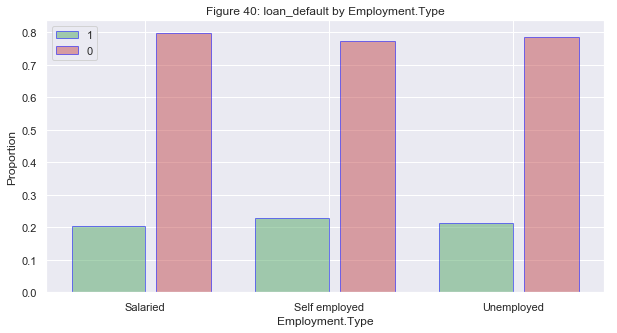

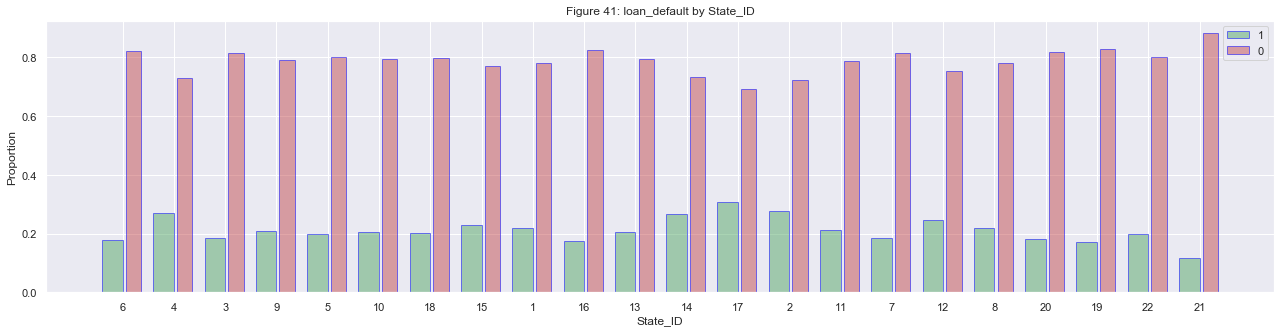

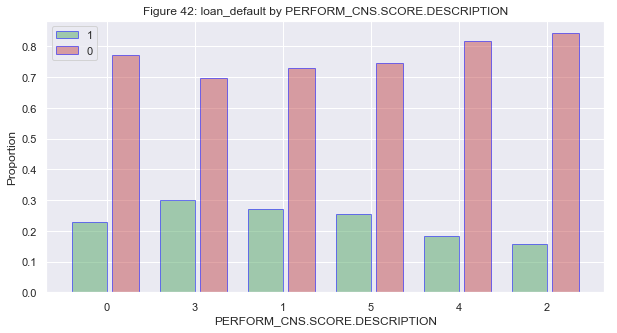

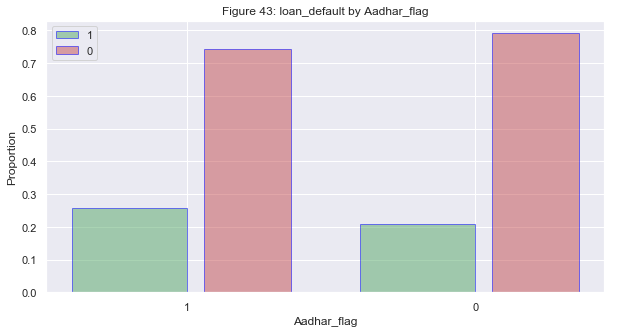

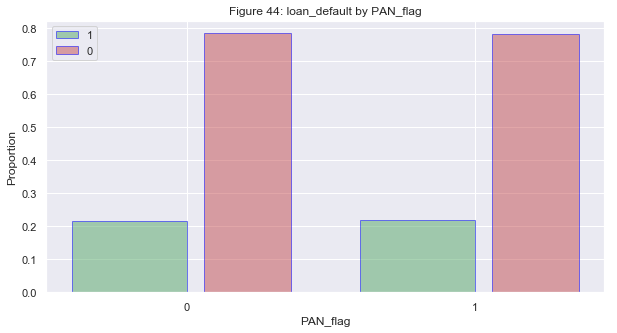

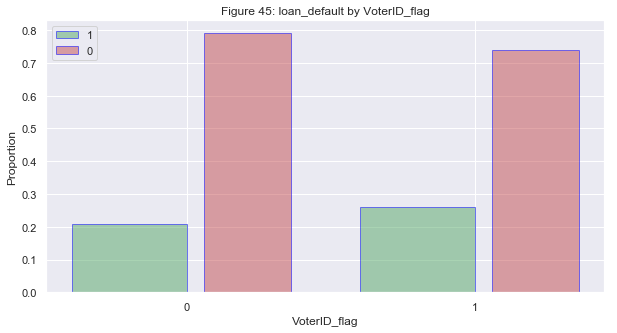

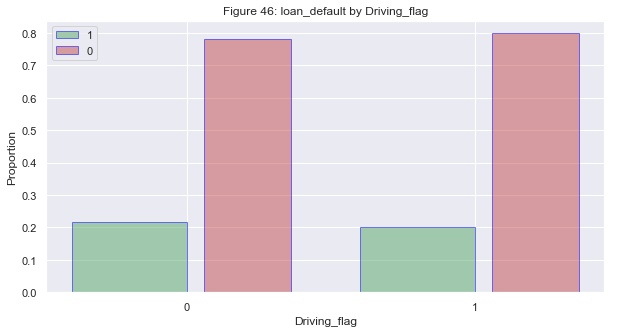

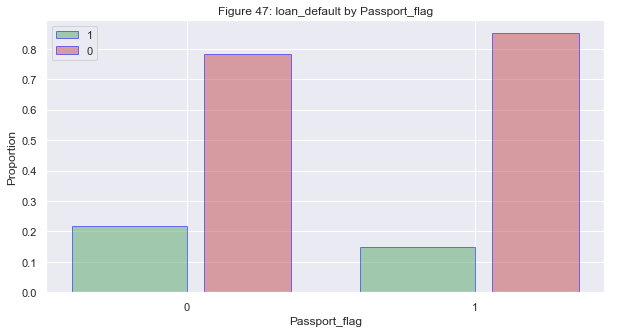

In [28]:
for col in ['Employment.Type', 'State_ID','PERFORM_CNS.SCORE.DESCRIPTION', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']:
    print('')
    print('')
    BarPlotCategory(col,i)
    i = 1 + i

# Summary

In Phase 1, we removed attribtes `UniqueID`, `supplier_id`, `Current_pincode_ID`, `DisbursalDate`, `Employee_code_ID` as they do not play any predicting role in our case. We imputed NA values in `Employment.Type` by introducing a third category for that attribute; `Unemployed` & in Continuous features, there were no missing values. We have created 3 new attributes `Age`, `AvgAcctAge` & `CredAcctAge` by using `Date.of.Birth`, `AVERAGE.ACCT.AGE` & `CREDIT.HISTORY.LENGTH` and then dropped these old attributes, and visualized these new attributes as well to find meaningful patterns or information. Also, we have encoded `PERFORM_CNS.SCORE.DESCRIPTION` to convert it into numeric from category. From the data exploration, we found that  **`disbursed_amount`, `asset_cost`, `ltv`, `branch_id`, `manufacturer_id`,
       `Employment.Type`, `State_ID`, `MobileNo_Avl_Flag`, `Aadhar_flag`,
       `PAN_flag`, `VoterID_flag`, `Driving_flag`, `Passport_flag`,
       `PERFORM_CNS.SCORE`, `PERFORM_CNS.SCORE.DESCRIPTION`, `PRI.NO.OF.ACCTS`,
       `PRI.ACTIVE.ACCTS`, `PRI.OVERDUE.ACCTS`, `PRI.CURRENT.BALANCE`,
       `PRI.SANCTIONED.AMOUNT`, `PRI.DISBURSED.AMOUNT`, `SEC.NO.OF.ACCTS`,
       `SEC.ACTIVE.ACCTS`, `SEC.OVERDUE.ACCTS`, `SEC.CURRENT.BALANCE`,
       `SEC.SANCTIONED.AMOUNT`, `SEC.DISBURSED.AMOUNT`, `PRIMARY.INSTAL.AMT`,
       `SEC.INSTAL.AMT`, `NEW.ACCTS.IN.LAST.SIX.MONTHS`,
       `DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS`, `NO.OF_INQUIRIES`,
       ``, `Age`, `AvgAcctAge`, `CredAcctAge`** were potentially useful features in predicting the target **`loan_default`**.


In Phase 2, We will continue with these processed data and **Normalize & Scale** it if needed, and then continue with our prediction.